## Goal: Build a DNN with Keras and Address Overfitting Using Dropout, Early Stopping, and Optimizer Comparison


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ==========================================
# 1. Load and prepare data again
# ==========================================

df = pd.read_csv('medical_data_40.csv')
X = df.drop('Target', axis=1).values
y = df['Target'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [3]:

# ==========================================
# 2. Function to Build Model (Flexible Architecture)
# ==========================================
def build_model(optimizer='adam', dropout_rate=0.0):
    model = Sequential()
    
    # Input Layer + 1st Hidden Layer
    # Using He Uniform initialization which is best for ReLU
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_initializer='he_uniform'))
    
    # Dropout Layer to prevent Overfitting
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    
    # 2nd Hidden Layer
    model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
    
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
        
    # Output Layer (Sigmoid for Binary Classification)
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [4]:
# ==========================================
# 3.1 Adam Optimizer with Dropout
# ==========================================
print("Training Model with Adam Optimizer...")
modelAdam = build_model(optimizer=Adam(learning_rate=0.001), dropout_rate=0.2)

# Early Stopping: Stop training if validation loss doesn't improve for 10 epochs
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history_adam = modelAdam.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test),
    epochs=100, 
    batch_size=8, 
    callbacks=[early_stop],
    verbose=0
)
# ==========================================
# 3.2 SGD Optimizer with Dropout
# ==========================================
print("Training Model with SGD Optimizer...")
modelSgd = build_model(optimizer=SGD(learning_rate=0.01, momentum=0.9), dropout_rate=0.2)

history_sgd = modelSgd.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test),
    epochs=100, 
    batch_size=8, 
    callbacks=[early_stop],
    verbose=0
)


Training Model with Adam Optimizer...


d:\github ML REPO\venv\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Model with SGD Optimizer...


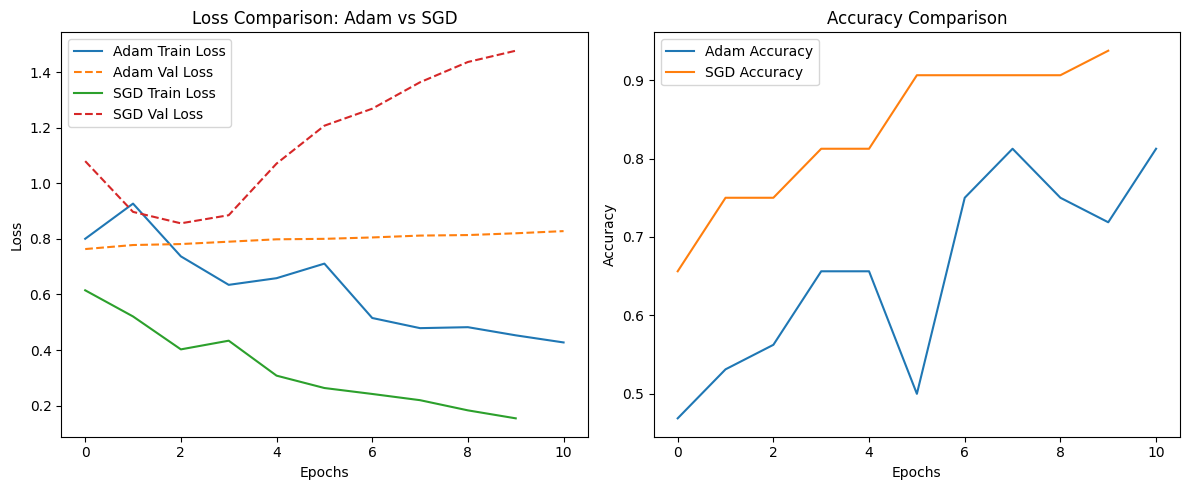

In [5]:
# ==========================================
# 4. Visualization: Comparing Optimizers
# ==========================================
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history_adam.history['loss'], label='Adam Train Loss')
plt.plot(history_adam.history['val_loss'], label='Adam Val Loss', linestyle='--')
plt.plot(history_sgd.history['loss'], label='SGD Train Loss')
plt.plot(history_sgd.history['val_loss'], label='SGD Val Loss', linestyle='--')
plt.title('Loss Comparison: Adam vs SGD')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_adam.history['accuracy'], label='Adam Accuracy')
plt.plot(history_sgd.history['accuracy'], label='SGD Accuracy')
plt.title('Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
# ==========================================
# 5. Final Evaluation
# ==========================================
loss, acc = modelAdam.evaluate(X_test, y_test, verbose=0)
print(f"Final Test Accuracy (Adam): {acc*100:.2f}%")

Final Test Accuracy (Adam): 50.00%
